# DS7331 Project 1 
#### Group 2: Hollie Gardner, Cleveland Johnson, Shelby Provost
[Dataset Source](https://archive-beta.ics.uci.edu/ml/datasets/census+income)<br/>
[Github Repo](https://github.com/ShelbyP27/DS7331-Project)

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

## Lab One - Visualization and Data Preprocessing 
### Part One: Business Understanding 
* **1. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).**<br>
    <br>Census data is regularly collected by the US Census Bureau in order for the government to understand the characteristics of US population. Data collected from every household in the US through census surveys typically includes details on a number of items such as number of people in the household, income, profession, race/ethnity, languages spoken, sex, age, etc. This dataset was extract from the 1994 Census database by Barry Becker for the purpose of predicting if an individual's income is greater than $50k.<br>
    <br>

* **2. Describe how you would define and measure the outcomes from the dataset.**<br>
    <br>The outcome of this data set is to assess if an indivdual has an income greater than &dollar;50k. Since the data set was given with the income listed as greater than 50k or less than 50k, the definition of the outcome is straight foward. We would measure the outcome by assessing the predictor variables for significance in predicting an individuals income. The statistically significant variables should have a minimal error in predictability.  <br>
    <br>
    
* **3. Why is this data important and how do you know if you have mined useful knowledge from the dataset?**<br>
    <br>This data is important because it helps the government understand the health of the economy and the ability of its citizens to participate fully. The data can assist government offices in identifying priorities for initiatives or policies to push forward. Furthermore, the data can provide some insight into any inequities that exist within sex, age, or race categories or comparing similar jobs across private and government sectors. Useful knowledge mined from the dataset would be able to confidently explain possible relationships from correlations between the attributes to provide insights to provide the "what" is happening, so action can be taken to figure out "why" it is happening. <br>
    <br>
* **4. How would you measure the effectiveness of a good prediction algorithm?**<br>
    <br>The effectiveness of a good prediction algorithm would be measured through the error rates in the algorithm's ability to classify learn from the training data and predict the individual income categories in the test set based off of the attributes provided.

### Part Two: EDA 
**1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.**



This dataset contains 15 attributes for 32,560 instances in the training set. The test set includes an additional 16,281 instances. In addition to the code below, details were obtained from the adult.names file provided by dataset donors from the above linked UCI website.

The attribute descriptions are as follows:
* **age** (integer, range 17-90 ): This is the age of the individual. 
* **workclass** (categorical, 9 levels): Work class is the sector or category of the individual's occupation
* **fnlwgt** (integer, range 13769-1484705): The "final weight" attribute was calculated from the Current Population Survey and "refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population." (See full description of this attribute from Kohavi and Becker below)
* **education** (categorical, 16 levels): Highest level of education the individual has obtained
* **education-num** (integer, range 1-16): ___
* **marital-status** (categorical, 7 levels): The individual's marital status
* **occupation** (categorical, 15 levels): The type of work an individual performs
* **relationship** (categorical, 6 levels): ____
* **race** (categorical, 5 levels): Individual's racial group
* **sex** (categorical, 2 levels): Male or Female
* **capital-gain** (integer, range 0-99999): _____
* **capital-loss** (integer, range 0-4356): _____
* **hours-per-week** (integer, range 1-99): Number of hours per week individual works in occupation
* **native-country** (categorical, 42 levels): The individual's native country
* **income** (categorical, 2 levels): This has been converted from the raw data to be less than or equal to $50K or greater than $50K
<br>
<br>**Kohavi and Becker Description of Final Weight from adult.names file:**
<br>
<br>| The weights on the CPS files are controlled to independent estimates of the
<br>| civilian noninstitutional population of the US.  These are prepared monthly
<br>| for us by Population Division here at the Census Bureau.  We use 3 sets of
<br>| controls.
<br>|  These are:
<br>|          1.  A single cell estimate of the population 16+ for each state.
<br>|          2.  Controls for Hispanic Origin by age and sex.
<br>|          3.  Controls by Race, age and sex.
<br>|
<br>| We use all three sets of controls in our weighting program and "rake" through
<br>| them 6 times so that by the end we come back to all the controls we used.
<br>|
<br>| The term estimate refers to population totals derived from CPS by creating
<br>| "weighted tallies" of any specified socio-economic characteristics of the
<br>| population.
<br>|
<br>| People with similar demographic characteristics should have
<br>| similar weights.  There is one important caveat to remember
<br>| about this statement.  That is that since the CPS sample is
<br>| actually a collection of 51 state samples, each with its own
<br>| probability of selection, the statement only applies within
<br>| state.

In [3]:
# Importing the census dataset using pandas
# Reading the CSV file after converting file to csv and removing superfluous spaces via Excel.
df = pd.read_csv('https://raw.githubusercontent.com/ShelbyP27/DS7331-Project/main/adult-data.csv')

# Getting a first look at the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#summary of the dataset
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
#obtaining number of levels for each object attribute
print(df.nunique())

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64


**2. Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems?**<br>
<br>
    According to the Kohavi and Becker, the following changes have already been made to the raw data:
* Discretized agrossincome into two ranges with threshold 50,000.
* Convert U.S. to US to avoid periods.
* Convert Unknown to "?"
* Run MLC++ GenCVFiles to generate data,test.
<br>

Therefore, we will begin by looking for the '?' values in the dataset by counting the number in each column. Then, we will replace as null using numpy. We decided to handle missing values in the following three variables which possessed missing values as below: 

* Workclass: 1836 rows
* Occupation: 1843 rows
* Native-Country: 583 rows

There is not a way to impute values for these categorical variables and leaving as unknown variables does not add value to our analysis. Therefore, these rows will be removed leaving us with 30,162 complete rows in this dataframe.

As for duplicates, Kohavi and Becker described 6 duplicate rows. After reviewing our current dataframe, there do not appear to be any instances of duplicate data.


In [6]:
#viewing number of missing values that had 
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
#converting '?' values to nan and then removing the row (code from asynch 1 notebook)
df = df.replace(to_replace='?',value=np.nan) # replace -1 with NaN (not a number)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [8]:
#drop rows that still had missing values
df.dropna(inplace=True)

In [9]:
#Kohavi and Becker describe 6 instances of duplicates. i can't seem to find them. 
df.duplicated(subset=None, keep='first')
df.info()
#no changes in values. the duplicates have likely been removed prior.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**3. Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.**

In [10]:
#convert income to 0 and 1 to enable easier analysis (code from https://towardsdatascience.com/a-beginners-guide-to-data-analysis-machine-learning-with-python-adult-salary-dataset-e5fc028b6f0a)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [11]:
print('Percentage of Individuals with Income Greater than $50K')
print ((df.income.sum() / df.income.count())*100) #percentage

Percentage of Individuals with Income Greater than $50K
24.892248524633644


In [12]:
#viewing the statistics for the numeric attributes
print('General Statistics for Numeric Values')
df.describe()

General Statistics for Numeric Values


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [13]:
#creating dataframes for percentage of each level in the categorical attribute
race_per = df['race'].value_counts()/len(df)*100
sex_per = df['sex'].value_counts()/len(df)*100
marital_per = df['marital-status'].value_counts()/len(df)*100
country_per = df['native-country'].value_counts()/len(df)*100
education_per = df['education'].value_counts()/len(df)*100
workclass_per = df['workclass'].value_counts()/len(df)*100
occupation_per = df['occupation'].value_counts()/len(df)*100
relation_per = df['relationship'].value_counts()/len(df)*100

Percentage of Each Sex Level
Male      67.568464
Female    32.431536
Name: sex, dtype: float64


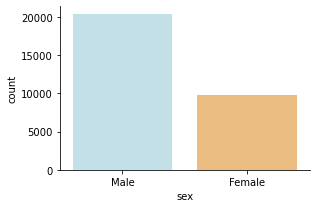

In [14]:
ax = sns.catplot(x="sex", data=df, kind="count", height=3, aspect=1.5, palette='RdYlBu_r')
print('Percentage of Each Sex Level')
print(sex_per)

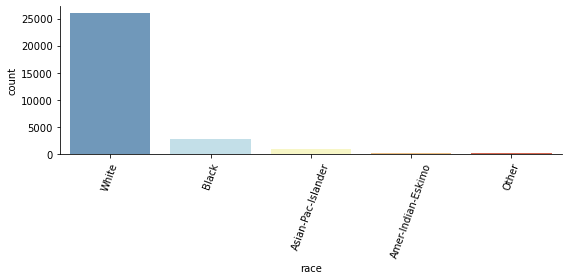

Percentage of Each Race Categorical Level
White                 85.979046
Black                  9.339566
Asian-Pac-Islander     2.967310
Amer-Indian-Eskimo     0.948213
Other                  0.765864
Name: race, dtype: float64


In [15]:
ax = sns.catplot(x="race", data=df, kind="count", height=4, aspect=2, palette='RdYlBu_r')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()
print('Percentage of Each Race Categorical Level')
print(race_per)

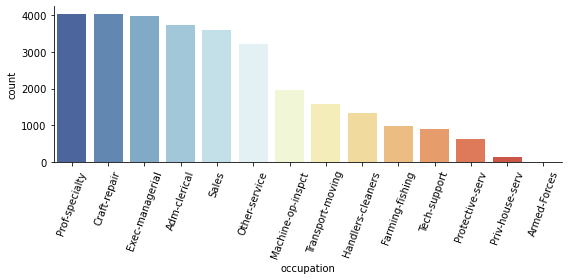

Percentage of Each OccupationLevel
Prof-specialty       13.387706
Craft-repair         13.361183
Exec-managerial      13.235197
Adm-clerical         12.336715
Sales                11.882501
Other-service        10.649161
Machine-op-inspct     6.518135
Transport-moving      5.211856
Handlers-cleaners     4.475831
Farming-fishing       3.278960
Tech-support          3.023672
Protective-serv       2.135137
Priv-house-serv       0.474106
Armed-Forces          0.029839
Name: occupation, dtype: float64


In [16]:
ax = sns.catplot(x="occupation", data=df, kind="count", height=4, aspect=2, palette='RdYlBu_r', 
    order=df['occupation'].value_counts().index)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()
print('Percentage of Each OccupationLevel')
print(occupation_per)

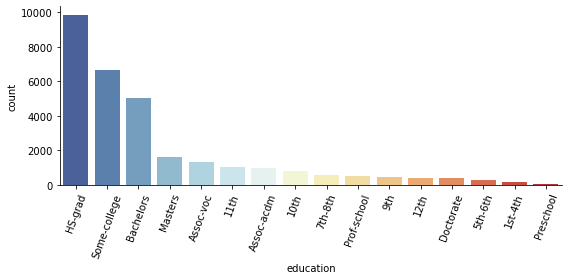

Percentage of Each Education Categorical Level
White                 85.979046
Black                  9.339566
Asian-Pac-Islander     2.967310
Amer-Indian-Eskimo     0.948213
Other                  0.765864
Name: race, dtype: float64


In [17]:
ax = sns.catplot(x="education", data=df, kind="count", height=4, aspect=2, palette='RdYlBu_r', 
    order=df['education'].value_counts().index)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()
print('Percentage of Each Education Categorical Level')
print(race_per)

The above provides a snapshot of what is happening within the numeric values. 

In [18]:
#Aggregating by race and income over 50K (code adapted from asynch 2 notebook)
df_grouped = df.groupby(by='race')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='sex')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='marital-status')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='native-country')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage

race
Amer-Indian-Eskimo    0.118881
Asian-Pac-Islander    0.277095
Black                 0.129925
Other                 0.090909
White                 0.263718
Name: income, dtype: float64
sex
Female    0.113678
Male      0.313837
Name: income, dtype: float64
marital-status
Divorced                 0.107262
Married-AF-spouse        0.476190
Married-civ-spouse       0.454959
Married-spouse-absent    0.083784
Never-married            0.048324
Separated                0.070288
Widowed                  0.096735
Name: income, dtype: float64
native-country
Cambodia                      0.388889
Canada                        0.336449
China                         0.294118
Columbia                      0.035714
Cuba                          0.271739
Dominican-Republic            0.029851
Ecuador                       0.148148
El-Salvador                   0.090000
England                       0.348837
France                        0.444444
Germany                       0.343750
Greece        

In [19]:
df_grouped = df.groupby(by='occupation')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='workclass')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage

occupation
Adm-clerical         0.133835
Armed-Forces         0.111111
Craft-repair         0.225310
Exec-managerial      0.485220
Farming-fishing      0.116279
Handlers-cleaners    0.061481
Machine-op-inspct    0.124619
Other-service        0.041096
Priv-house-serv      0.006993
Prof-specialty       0.448489
Protective-serv      0.326087
Sales                0.270647
Tech-support         0.304825
Transport-moving     0.202926
Name: income, dtype: float64
workclass
Federal-gov         0.387063
Local-gov           0.294630
Private             0.218792
Self-emp-inc        0.558659
Self-emp-not-inc    0.285714
State-gov           0.268960
Without-pay         0.000000
Name: income, dtype: float64


In [20]:
#calculating the percentage of each grouped category by race and sex
df_grouped = df.groupby(by=['race','sex'])
print ("Percentage of individuals with income greater than 50K in each group:")
print (df_grouped.income.sum() / df_grouped.income.count() *100)

Percentage of individuals with income greater than 50K in each group:
race                sex   
Amer-Indian-Eskimo  Female    10.280374
                    Male      12.849162
Asian-Pac-Islander  Female    13.945578
                    Male      34.442596
Black               Female     6.075768
                    Male      19.816643
Other               Female     4.597701
                    Male      11.805556
White               Female    12.298923
                    Male      32.531323
Name: income, dtype: float64


In [21]:
# this python magics will allow plot to be embedded into the notebook - code adapted from asynch 2 nb
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [22]:
# the cross tab operator provides an easy way to get these numbers
income50k = pd.crosstab([ df['race'],df['sex'] ], 
                       df.income.astype(bool))
print (income50k)

income                     False  True 
race               sex                 
Amer-Indian-Eskimo Female     96     11
                   Male      156     23
Asian-Pac-Islander Female    253     41
                   Male      394    207
Black              Female   1314     85
                   Male     1137    281
Other              Female     83      4
                   Male      127     17
White              Female   6924    971
                   Male    12170   5868


Percentage of Individuals by Race and Sex with Income>$50K


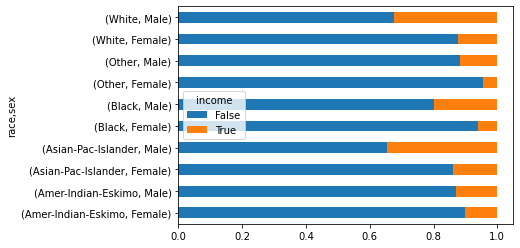

In [23]:
income50k_rate = income50k.div(income50k.sum(1).astype(float),
                             axis=0) # normalize the value

print('Percentage of Individuals by Race and Sex with Income>$50K')
# print survival_rate
ax = income50k_rate.plot(kind='barh', stacked=True)

**Interpretation of Crosstab for Race and Sex**

* White men and Asian Pacific Islander men have similar percentages of their respective groups which are the highest among all groups. 
* Women in each race category have a smaller percentage of earners over $50k than men in the same race. 
* The largest disparity across all groups exists for Black women and women who fall in the "Other" category. 

**4. Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.**

7 attributes were identified as important in terms of identifying whether income is greater than or less than \$50k.  The 7 important attributes are comprised of 3 numeric (Age, Education-Num Hours-per-week) and 4 categorical (Marital Status, Relationship, Race and Sex).  Each attribute will be visualized and explained below.

**Numeric Attributes**

Age: This age histrogram is subsetting for the reponse variable, income.  The histogram shows the right skew of the <\$50k histogram and the relative normalcy of the >\$50k historgram.  The initial visual separation the mean lend this attribute to additinal investigation. 

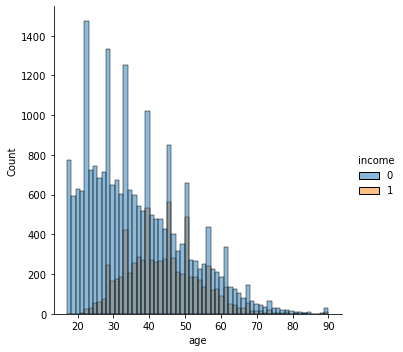

In [24]:
sns.displot(df,x="age",hue="income")

Education-Num:  This histogram demonstrates a very low number of occurrences for income >\$50k prior to 9 years.  The ratios between greater than and less than \$50k begin to flip as the numbers increase from 9.  This provides a visual seperation that should be investigated further.

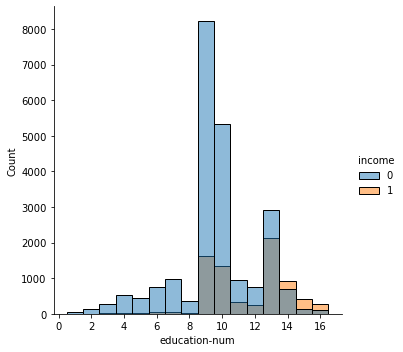

In [25]:
sns.displot(df,x="education-num", discrete=True,hue="income")

Hours-Per-Week: A Kernel density estimation plot was used to make the hours-per-week attribute more easily readable.  The choice becomes obvious when compared to the histogram below.  The histogram is quite difficult to read due to the high smapling rate at the 40 hours per week.  While the Kernel Denity does not provide an accurate count, it does help showcase the greater than \$50k curve that is near zero prior to 40 hours per week adn then tapers to somewhere between 60 and 80 hours per week.  The ratio between geater than and less than \$50k increases as the curve tapers to the right.

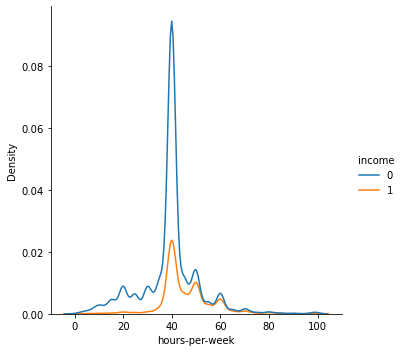

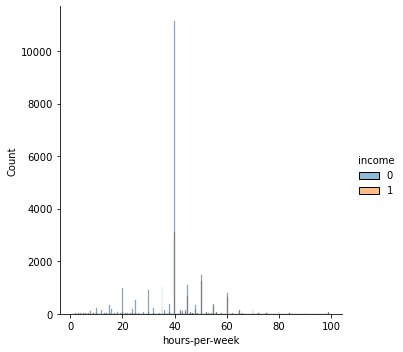

In [26]:
sns.displot(df,x="hours-per-week",hue="income", kind='kde')
sns.displot(df,x="hours-per-week",hue="income")

**Categorical Attributes**

Marital-Status: A proportional plot was used to for martial-status.  The propportional plot provides the percentage of responses that are greater than \$50k (true) as opposed to less than \$50k (false).  I've added a stacked bar chart with  count along side the proportional chart.  The stacked bar chart is helpful, but due to the size of one category, married-civ-spouse in this case, the other counts are almost invisible.  The proportion chart enables the observation of each category to understand it's impact on the response.

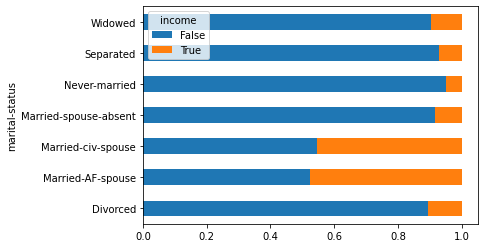

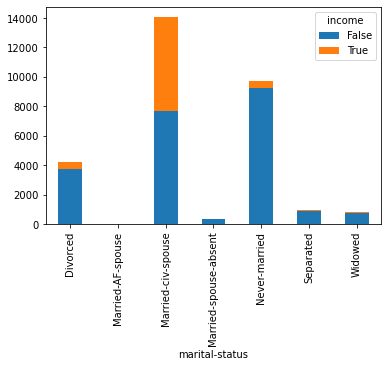

In [27]:
income_marital = pd.crosstab([ df['marital-status'] ], df.income.astype(bool))
marital_rate = income_marital.div(income_marital.sum(1).astype(float),axis=0)
marital_rate.plot(kind='barh', stacked=True)

income_marital.plot(kind='bar', stacked=True)

Relationship: I have continue to leverage the proporation plot as the primary visualization for the categorical variables.  This plot shows a clear separation between Husband/Wife and the other categories.  The Husband and Wife category have more than 40\% responses for greater than \$50k.  While there is a potential for covariance, this attribute warrants further investgation.

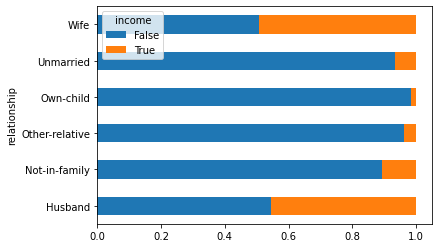

In [28]:
income_relationship = pd.crosstab([ df['relationship'] ], df.income.astype(bool))
relationship_rate = income_relationship.div(income_relationship.sum(1).astype(float),axis=0)
relationship_rate.plot(kind='barh', stacked=True)

Race: This proportion plot demonstrates that 25\% to 30\% of the White and Asian-Pac-Islander havea greater than \$50k response.  This is large enough to warrant investigation and could be interesting when combined with other variables.

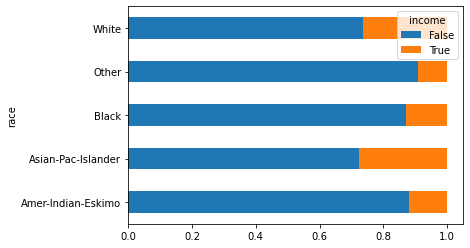

In [30]:
income_race = pd.crosstab([ df['race'] ], df.income.astype(bool))
race_rate = income_race.div(income_race.sum(1).astype(float),axis=0)
race_rate.plot(kind='barh', stacked=True)

Sex: The proportion plot so an approximate difference of 20\% between Male and Female for greater than \$50k.  This visual distinction provides ample evidence to continue with treating Sex as an important attribute.

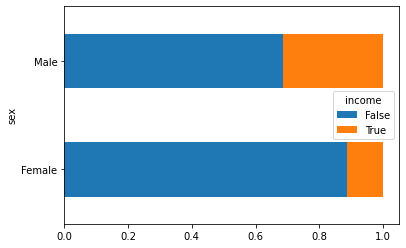

In [29]:
income_sex = pd.crosstab([ df['sex'] ], df.income.astype(bool))
sex_rate = income_sex.div(income_sex.sum(1).astype(float),axis=0)
sex_rate.plot(kind='barh', stacked=True)

**5. Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.** 

Based on the scatterplot, there appears to be a relationship between age and final weight (fnlwgt). There does not appear to be other relationships present in the raw data as is. 

The heatmap shows that there is high correlation between income and education number. The correlation between all other variables are not of much significance. However, the variables age, capital gain, and hours per week are somewhat correlated with income. 

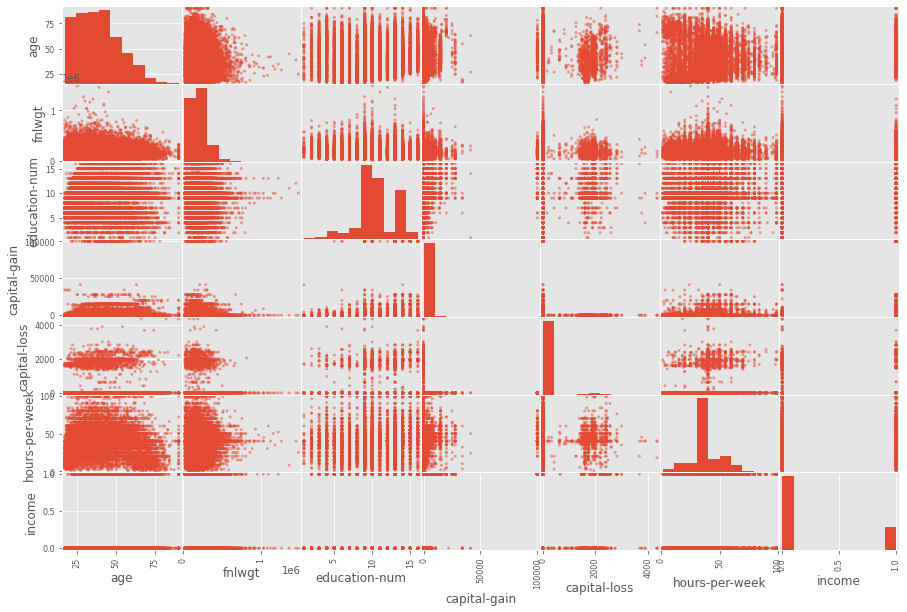

In [22]:
# Scatterplot Matrix to explore relationships amoung the variables. (Code adapted from Asynch 02 Data Visualization notebook) )
from pandas.plotting import scatter_matrix
ax = scatter_matrix(df,figsize=(15, 10))

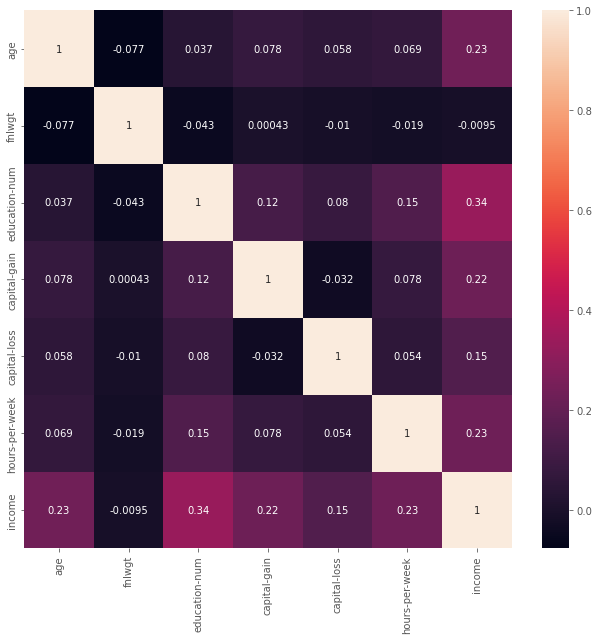

In [24]:
# Using a heatmap to assess corrrelation between the variables (Code adapted from Asynch 02 Data Visualizations Notebook)
import seaborn as sns
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True)
f.tight_layout()

**6. Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).**

Veiwing the separation of the predictor variables by our response variable, we are able to identify key relationships of the income variable. From the scatterplot matrix, there appears to be a relationships between age, final weight, and hour per week with the education number variable.  

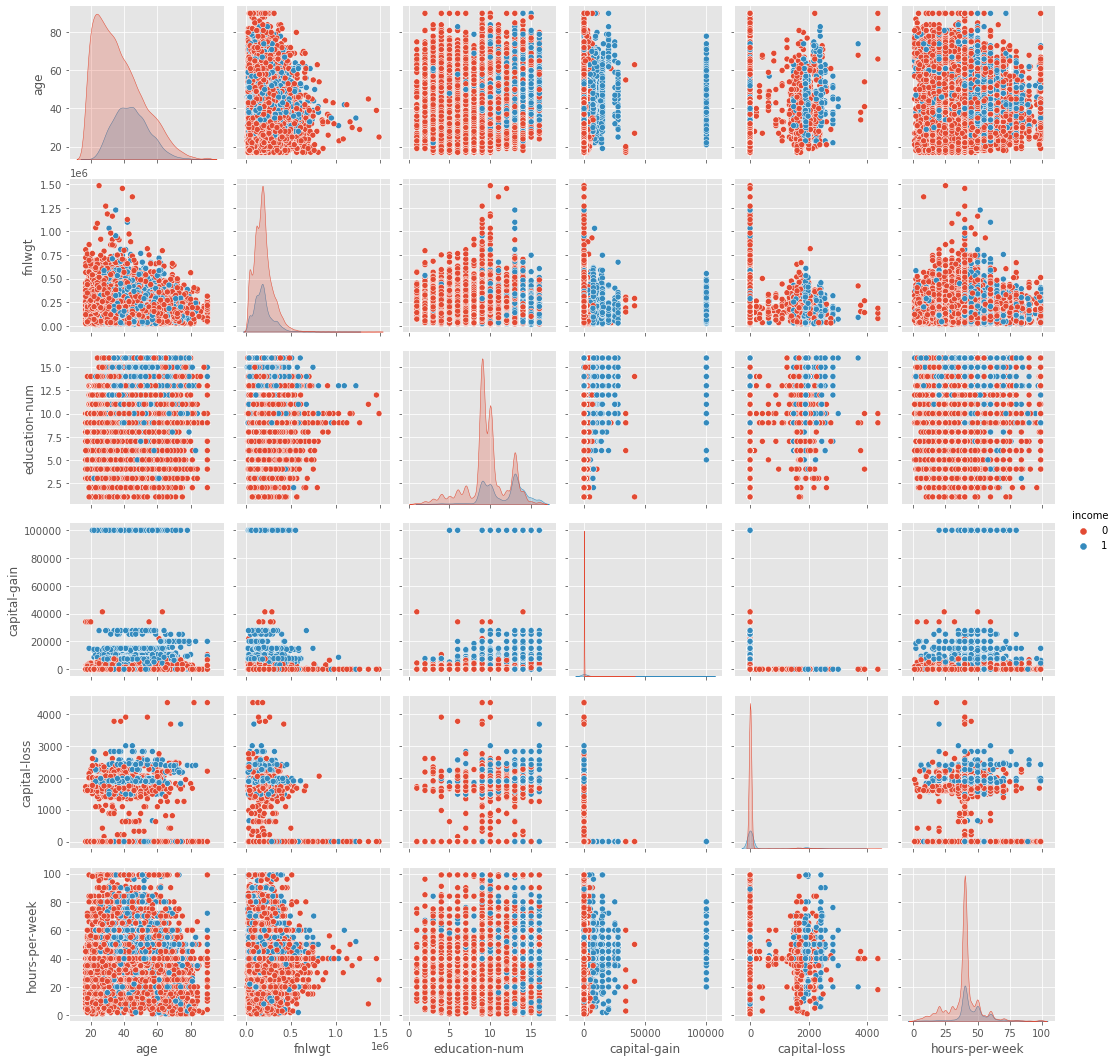

In [31]:
# Scatterplot matrix showing relationships by income level. 
sns.pairplot(df, hue="income")

Education-Num vs. Age Scatterplot


<AxesSubplot:xlabel='education-num', ylabel='age'>

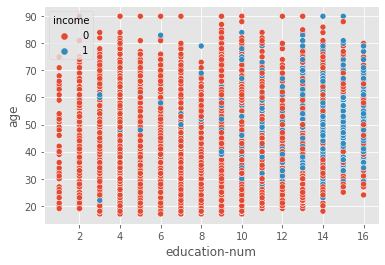

In [59]:
print('Education-Num vs. Age Scatterplot')
sns.scatterplot(data=df, x="education-num", y="age", hue="income")

Education-Num vs. Fnlwgt


<AxesSubplot:xlabel='education-num', ylabel='fnlwgt'>

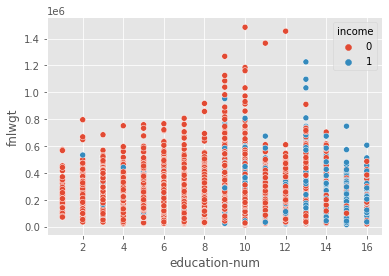

In [60]:
print('Education-Num vs. Fnlwgt')
sns.scatterplot(data=df,x="education-num",y="fnlwgt",hue="income")

Education-Num vs. Hours-per-Week


<AxesSubplot:xlabel='education-num', ylabel='hours-per-week'>

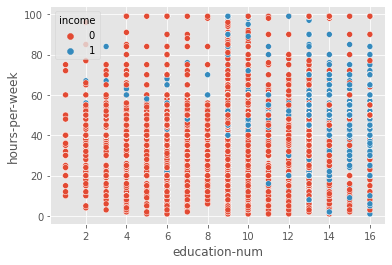

In [61]:
print('Education-Num vs. Hours-per-Week')
sns.scatterplot(data=df,x="education-num", y="hours-per-week",hue="income")

**7. Are there other features that could be added to the data or created from existing features? Which ones?**

A feature that could be added to this data set using the information provided is whether the person is an immigrant. We could use the column 'Native Country' to assign a binary variable to each instance, resulting in a variable indicating 1 for 'immigrant' and 0 for those whose native country is 'United States'. This variable could then be visually assesed to highlight any differences in income distribution by immigration status. This information could be important to knowing how wealth is distributed and could be influencial in theorizing the *American Dream*. 

**8. Exceptional Work, One idea: implement dimensionality reduction, then visualize and interpret the results.**

In [62]:
df['immigrant'] = np.where(df['native-country']!= 'United-States', 1, 0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,immigrant
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1


In [63]:
# the cross tab operator of immigrant status and income
income50k = pd.crosstab([ df['immigrant']], 
                       df.income.astype(bool))
print (income50k)

income     False  True
immigrant             
0          21999  7171
1           2721   670


Percentage of Individuals by Immigrant Status(1) with Income>$50K


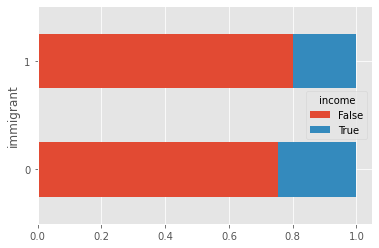

In [64]:
income50k_rate = income50k.div(income50k.sum(1).astype(float),
                             axis=0) # normalize the value

print('Percentage of Individuals by Immigrant Status(1) with Income>$50K')
# print income50k_rate
ax = income50k_rate.plot(kind='barh', stacked=True)

**Interpretation of cross tab immigrant status**<br/>
The percentage of immigrants who have an imcome greater than 50k is less than the percentage of non-immigrants who have an income greater than 50k. While this could be affected by a number of other factors, there may be some indication that there are barriers that prevent immigrants from participating fully or receiving the same income for the same work as non-immigrants. 